In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
# from: https://github.com/chrismeller/StarbucksLocations
df = pd.read_csv('stores.csv')

In [4]:
df.columns

Index([u'Id', u'StarbucksId', u'Name', u'BrandName', u'StoreNumber',
       u'PhoneNumber', u'OwnershipType', u'Street1', u'Street2', u'Street3',
       u'City', u'CountrySubdivisionCode', u'CountryCode', u'PostalCode',
       u'Longitude', u'Latitude', u'TimezoneOffset', u'TimezoneId',
       u'TimezoneOlsonId', u'FirstSeen', u'LastSeen'],
      dtype='object')

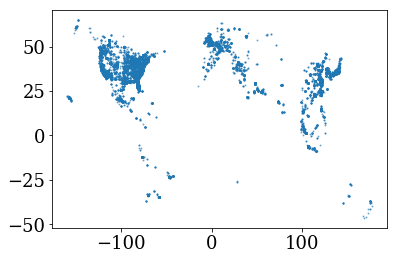

In [5]:
plt.scatter(df['Longitude'], df['Latitude'], s=4, alpha=0.5, marker='.')

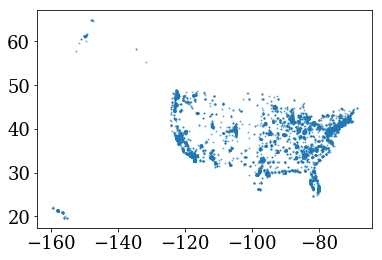

In [6]:
usa = df['CountryCode'] == 'US'

plt.scatter(df['Longitude'][usa], df['Latitude'][usa], s=4, alpha=0.5, marker='.')

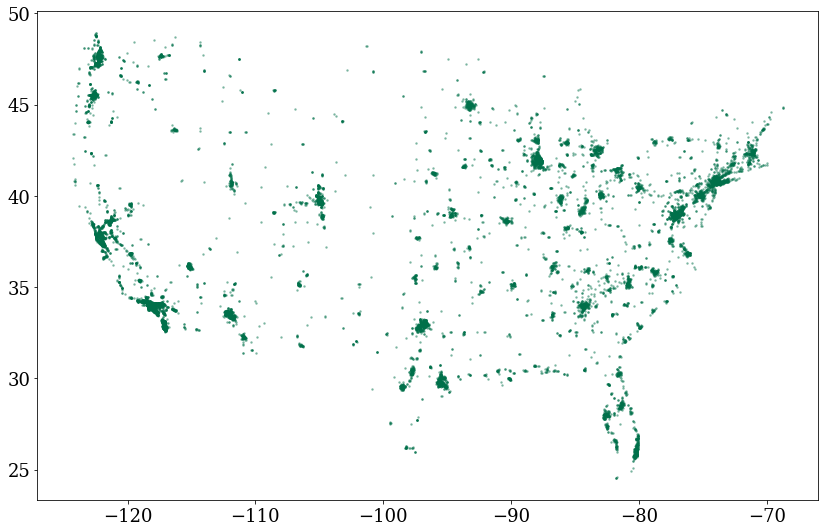

In [7]:
usa48 = (df['CountryCode'] == 'US') & (df['Longitude'] > -130) & (df['Latitude'] < 50)

plt.figure(figsize=(14,9))
plt.scatter(df['Longitude'][usa48], df['Latitude'][usa48], s=10, alpha=0.35, marker='.', c='#00704a')

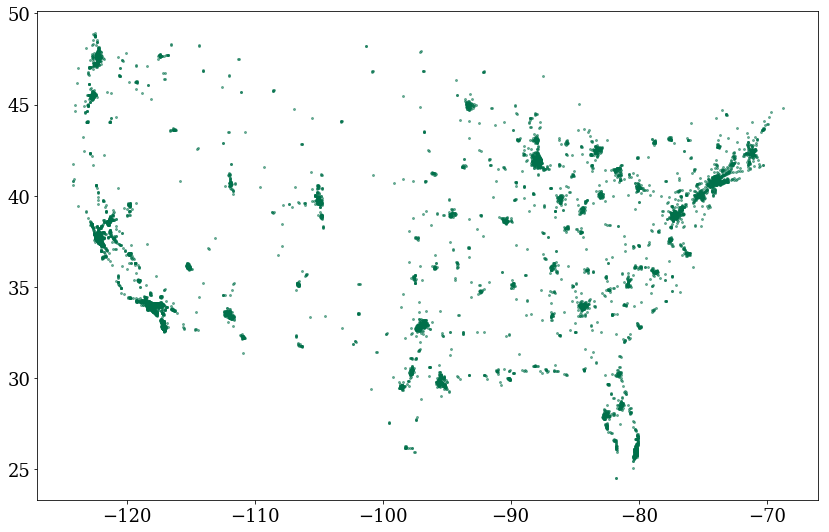

In [8]:
usa48co = (df['CountryCode'] == 'US') & (df['Longitude'] > -130) & (df['Latitude'] < 50) & (df[u'OwnershipType'] == 'CO')

plt.figure(figsize=(14,9))
plt.scatter(df['Longitude'][usa48co], df['Latitude'][usa48co], 
            s=15, alpha=0.5, marker='.', c='#00704a')

## Now for QHULL!

In [9]:
from scipy.spatial import Delaunay

In [10]:
points = np.vstack((df['Longitude'][usa48co], df['Latitude'][usa48co])).T
tri = Delaunay(points)

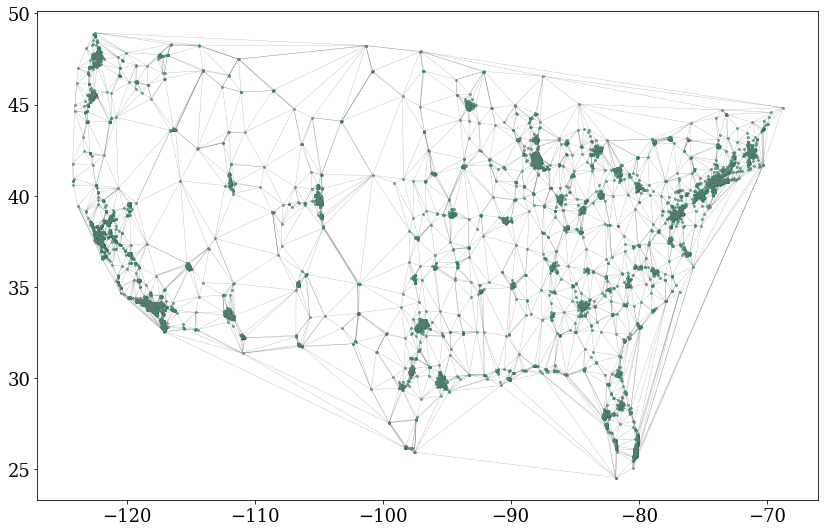

In [46]:
plt.figure(figsize=(14,9))
plt.scatter(df['Longitude'][usa48co], df['Latitude'][usa48co], 
            s=15, alpha=0.5, marker='.', c='#00704a')
plt.triplot(df['Longitude'][usa48co], df['Latitude'][usa48co], tri.simplices.copy(), 
            c='grey', alpha=0.7, lw=0.3)

In [12]:
from scipy.spatial import Voronoi, voronoi_plot_2d

In [49]:
vor = Voronoi(points)
vor.close()

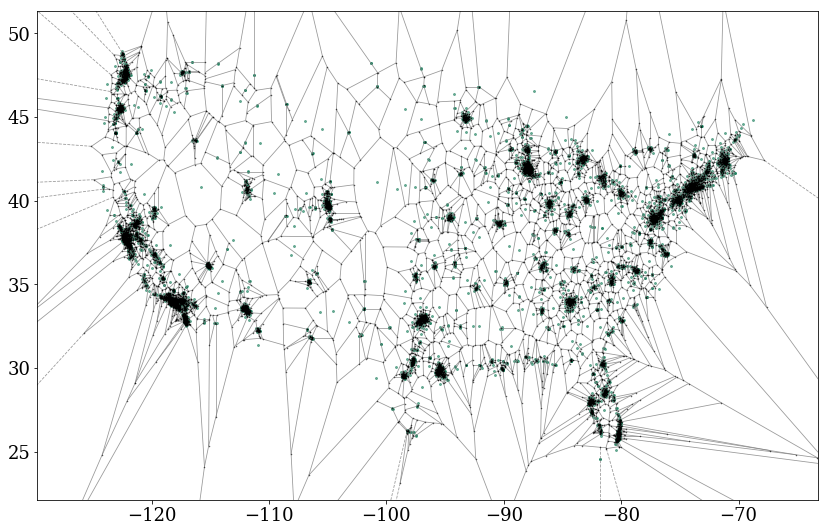

In [50]:
fig,ax = plt.subplots(figsize=(14, 9))
plt.scatter(df['Longitude'][usa48co], df['Latitude'][usa48co], 
            s=15, alpha=0.5, marker='.', c='#00704a')

f2=voronoi_plot_2d(vor, ax=ax, show_vertices=False, show_points=False, 
                   line_colors='grey', line_width=0.8, line_alpha=0.8)

ax.plot(vor.vertices[:,0], vor.vertices[:,1], 
        '.', c='k', markersize=1, alpha=0.7)

In [52]:
vor.vertices.shape

(13914, 2)

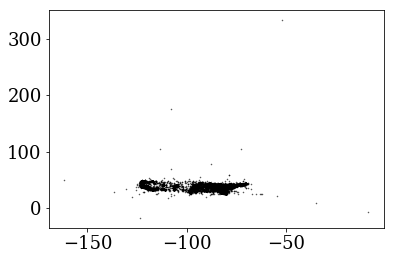

In [56]:
plt.plot(vor.vertices[:,0], vor.vertices[:,1], 
        '.', c='k', markersize=1, alpha=0.7)